In [ ]:
#Reading Dataset
import pandas as pd
df = pd.read_csv("/content/plant_growth_data.csv")
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


**Dataset** **Overview**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


**Data** **Preprocessing**

In [ ]:
df.isna().sum()

,0
Soil_Type,0
Sunlight_Hours,0
Water_Frequency,0
Fertilizer_Type,0
Temperature,0
Humidity,0
Growth_Milestone,0


In [ ]:
df.duplicated().sum()

0

**Data Visualization**

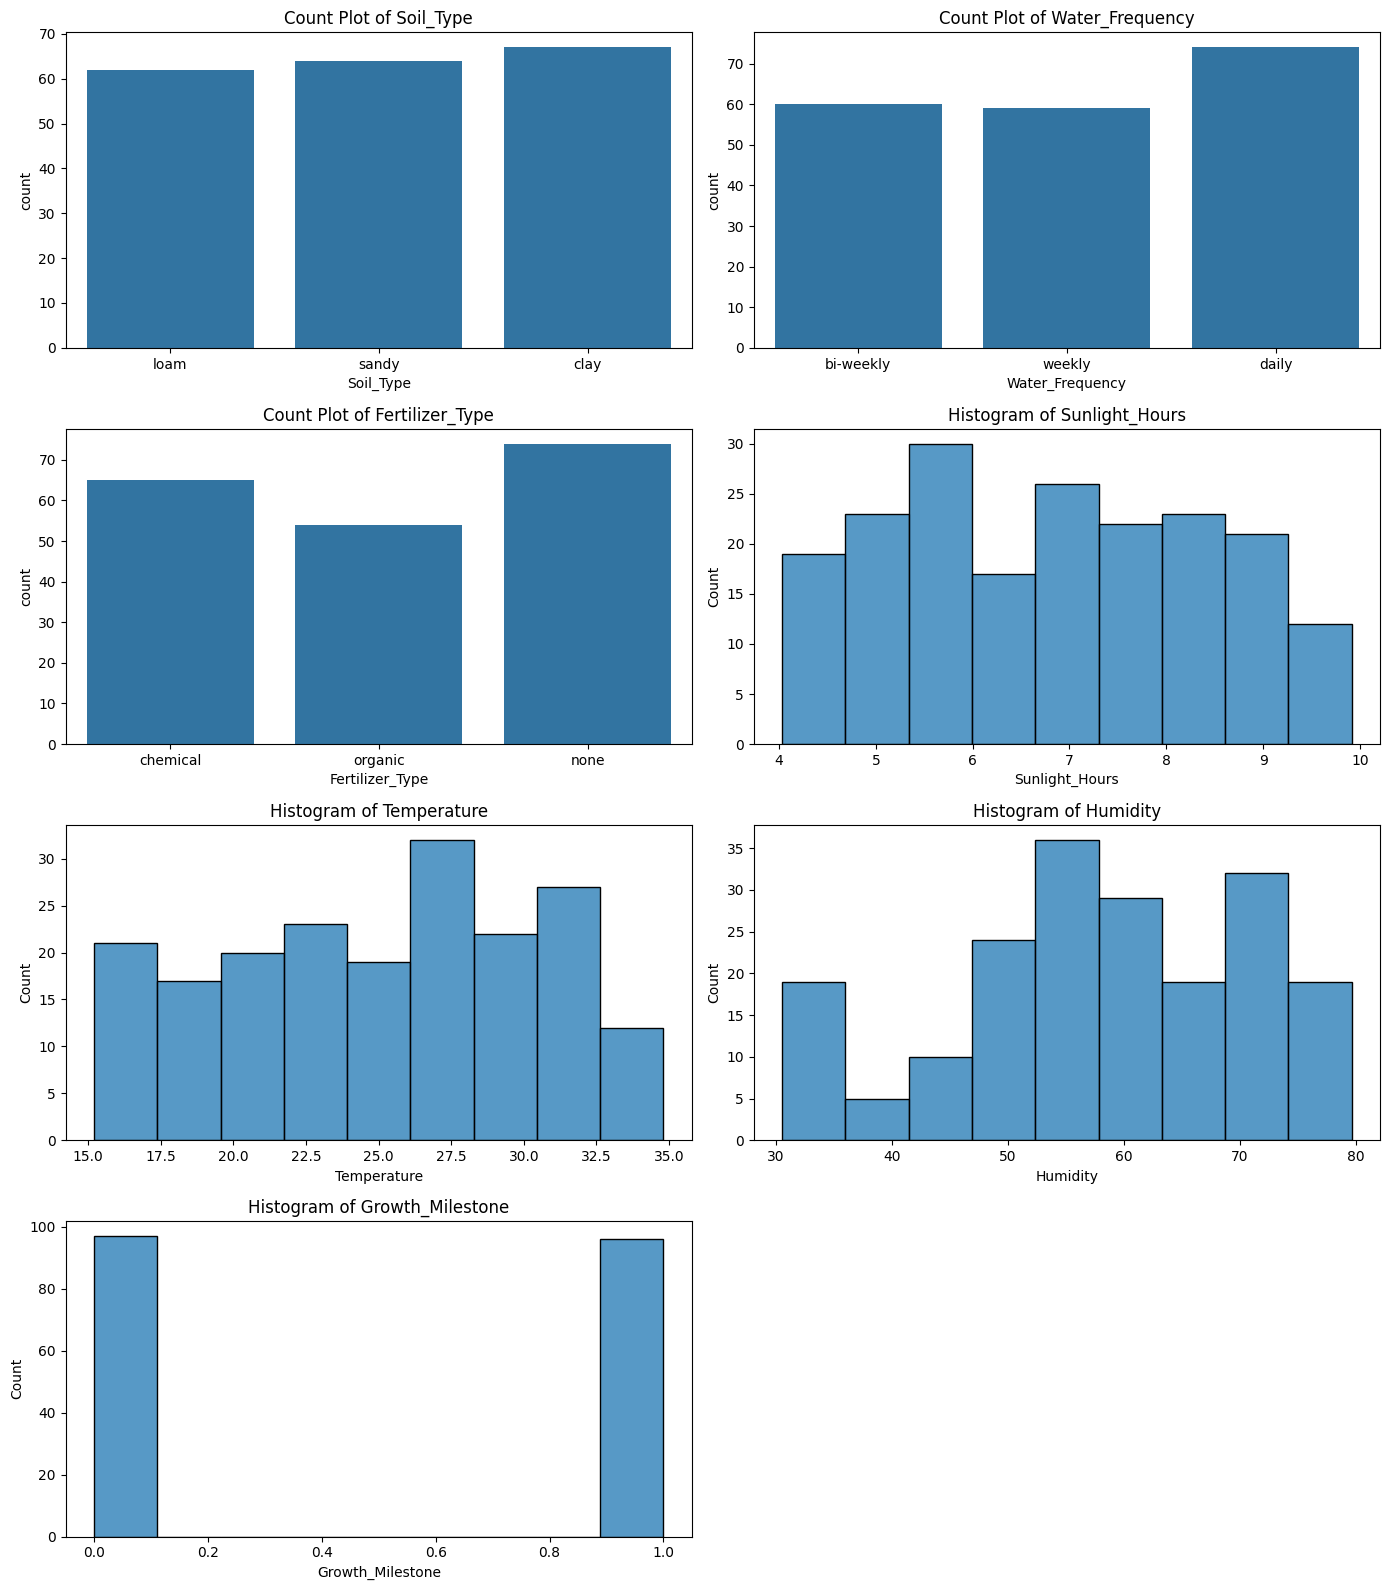

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


#Separate Categorical and Numerical Columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


# Determining the number of subplots needed

#Total number of columns to visualize
total_columns = len(categorical_columns) + len(numerical_columns)
# Calculates the number of rows needed,
rows = (total_columns + 1) // 2


# Creating subplots
fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 4))
axes = axes.flatten()

# Plotting countplots for categorical columns
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')

# Plotting histograms for numerical columns
for i, col in enumerate(numerical_columns, start=len(categorical_columns)):
    sns.histplot(df[col], kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Removing any empty subplots
for j in range(total_columns, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Feature And Target Variable**

In [ ]:
X = df.drop("Growth_Milestone",axis = 1)
y = df["Growth_Milestone"]

# split a dataset into features (X) and the target variable (y)

**Analysis of Features with Target**

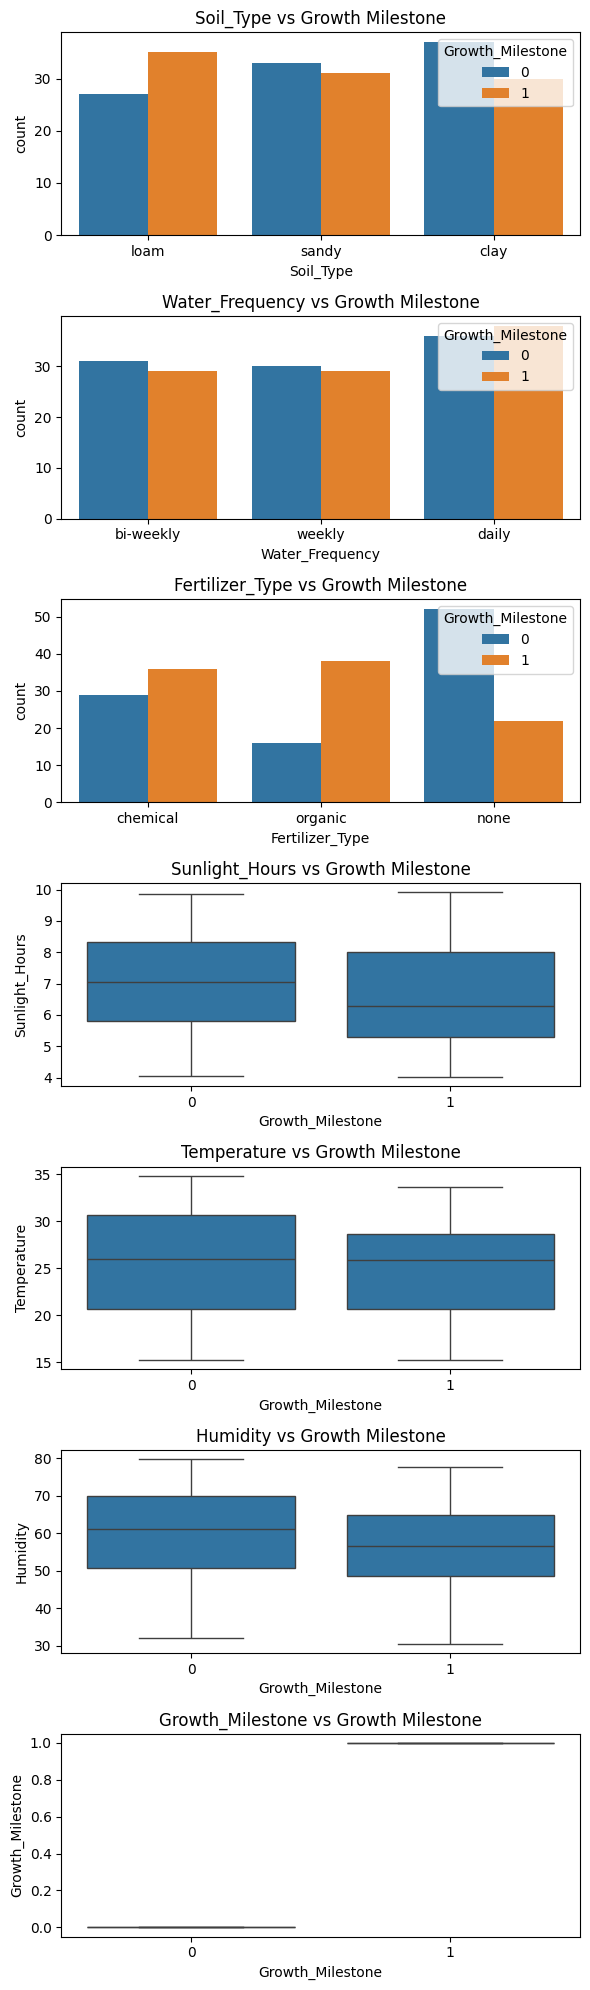

In [ ]:
#Analysis of X wrt y
import matplotlib.pyplot as plt
import seaborn as sns


# Create subplots for categorical and numerical columns
fig, axes = plt.subplots(len(categorical_columns) + len(numerical_columns), 1, figsize=(6, 20))
axes = axes.flatten()

# Plot for categorical columns
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], hue=df['Growth_Milestone'], ax=axes[i])
    axes[i].set_title(f'{col} vs Growth Milestone')

# Plot for numerical columns
for i, col in enumerate(numerical_columns, start=len(categorical_columns)):
    sns.boxplot(x=df['Growth_Milestone'], y=df[col], ax=axes[i])
    axes[i].set_title(f'{col} vs Growth Milestone')

plt.tight_layout()
plt.show()

**Encoding Categorical Data**

In [ ]:
X = pd.get_dummies(X)
#one-hot encoding

X.shape

(193, 12)

**Feature Scaling** or **Feature Extraction**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Train and Test Split**

In [ ]:
#comparing their performance based on accuracy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#A dictionary, classifiers, is created, mapping classifier names to their respective models
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter = 1000),
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy: {accuracy:.4f}")

RandomForest: Accuracy: 0.6207
SVC: Accuracy: 0.6034
DecisionTree: Accuracy: 0.4483
KNeighbors: Accuracy: 0.6034
LogisticRegression: Accuracy: 0.5517


**Hyperparameter Tuning**

In [ ]:
# for  best-performing classifier using Grid Search
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


classifiers = {
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    })}

for name, (clf, params) in classifiers.items():
    grid_search = GridSearchCV(clf, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Best Params: {grid_search.best_params_}, Accuracy: {accuracy:.4f}")

RandomForest: Best Params: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}, Accuracy: 0.9483
